In [53]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [54]:
data= pd.read_csv('Heart.csv',delimiter=',')
data = data.dropna()
data.columns
from sklearn.preprocessing import LabelEncoder
le_chestpain = LabelEncoder()
le_thal = LabelEncoder()
data['chest_encoded'] = le_chestpain.fit_transform(data.ChestPain)
data['thal_encoded'] = le_thal.fit_transform(data.Thal)

In [55]:
keys1=data.keys()[1:17]
AHD= np.array(data[['AHD']])
pred=data[keys1]
del pred['ChestPain']
del pred['Thal']
del pred['AHD']
pred=pred.values.reshape(-1,13)

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pred,AHD,test_size=0.5)
Y_train=np.ravel(Y_train)
Y_test=np.ravel(Y_test)

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
def bagg_error(X_train, Y_train,X_test,Y_test,num_trees):
    errores_normi_bc=[]
    errores_normi_rf=[]
    errores_ood_bc=[]
    errores_ood_rf=[]
    for j in range(20,num_trees):
        bc=BaggingClassifier(n_estimators=j,oob_score=True)
        fitbc =bc.fit(X_train,Y_train)
        rf=RandomForestClassifier(n_estimators=j,oob_score=True)
        fitrf =rf.fit(X_train,Y_train)
        errores_normi_bc.append(1-bc.score(X_test,Y_test))
        errores_normi_rf.append(1-rf.score(X_test,Y_test))
        errores_ood_bc.append(1-bc.oob_score_)
        errores_ood_rf.append(1-rf.oob_score_)
    errores_normi_bc=np.array(errores_normi_bc)
    errores_normi_rf=np.array(errores_normi_rf)
    errores_ood_bc=np.array(errores_ood_bc)
    errores_ood_rf=np.array(errores_ood_rf)
    n_arboles=np.arange(num_trees-20)
    plt.plot(n_arboles,errores_normi_bc,color='black',label='Test:Bagging')
    plt.plot(n_arboles,errores_normi_rf,color='yellow',label='Test_RandomForest')
    plt.plot(n_arboles,errores_ood_bc,color='green',label='OOD:Bagging')
    plt.plot(n_arboles,errores_ood_rf,color='blue',label='OOD:RandomForest')
    plt.xlabel('Number of trees')
    plt.ylabel('Error')
    plt.legend()
    
    plt.ylim(0.1,0.3)
    plt.xlim(0,300)
    
        
        
        
    

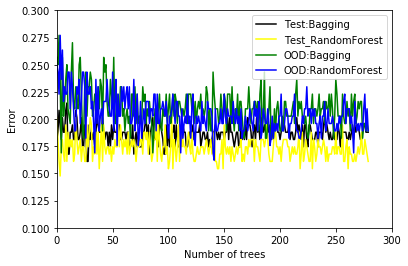

In [58]:
bagg_error(X_train, Y_train,X_test,Y_test,300)

In [59]:
dat=pd.read_csv('OJ.csv',delimiter=',')
dat = dat.dropna()
keys2=dat.keys()[2:19]
predictores=dat[keys2]
del predictores['Store7']
purch=dat['Purchase']
predictores=predictores.values.reshape(-1,16)
purch=purch.values.reshape(-1,1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(predictores,purch,test_size=0.5)
Y_train2=np.ravel(Y_train2)
Y_test2=np.ravel(Y_test2)

In [60]:
def rf_valuem(X_train, Y_train,X_test,Y_test,num_trees):
    errores_sqrt=[]
    errores_m=[]
    errores_m2=[]
    for i in range(20,num_trees):
        rf_sqrt=RandomForestClassifier(n_estimators=i,max_features='sqrt',oob_score=True)
        fit_sqrt =rf_sqrt.fit(X_train,Y_train)

        errores_sqrt.append(1-rf_sqrt.score(X_test,Y_test))
        rf_m=RandomForestClassifier(n_estimators=i,max_features=None,oob_score=True)
        fit_m =rf_m.fit(X_train,Y_train)
        
        errores_m.append(1-rf_m.score(X_test,Y_test))
        rf_m2=RandomForestClassifier(n_estimators=i,max_features=0.5,oob_score=True)
        fit_m2 =rf_m2.fit(X_train,Y_train)
        
        errores_m2.append(1-rf_m2.score(X_test,Y_test))
    errores_sqrt=np.array(errores_sqrt)
    errores_m=np.array(errores_m)
    errores_m2=np.array(errores_m2)
    n_arboles=np.arange(num_trees-20)
    plt.plot(n_arboles,errores_sqrt,color='green',label='$m=\sqrt{p}$')
    plt.plot(n_arboles,errores_m,color='orange',label='$m=p$')
    plt.plot(n_arboles,errores_m2,color='blue',label='$m=p/2$')
    plt.legend()
    plt.xlabel('Number of trees')
    plt.ylabel('Test classification error')
    
    
        
                   

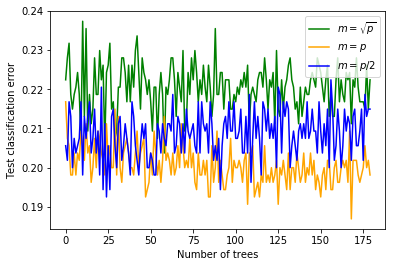

In [61]:
rf_valuem(X_train2, Y_train2,X_test2,Y_test2,200)

In [64]:
le_purchase = LabelEncoder()
dat['Purchase'] = le_purchase.fit_transform(dat.Purchase)
purch1=dat['Purchase']
keys2=dat.keys()[2:19]
predictores=dat[keys2]
del predictores['Store7']
predictores=predictores.values.reshape(-1,16)
purch1=purch1.values.reshape(-1,1)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(predictores,purch1,test_size=0.5)
Y_test3=np.ravel(Y_test3)
Y_train3=np.ravel(Y_train3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0,0.5,'Precision')

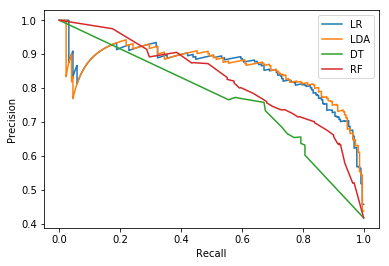

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
fit_lr=lr.fit(X_train3,Y_train3)
probas_lr=lr.predict_proba(X_test3)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
fit_lda=lda.fit(X_train3, Y_train3)
probas_lda=lda.predict_proba(X_test3)
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=8)
fit_dt = dt.fit(X_train3, Y_train3)
probas_dt=dt.predict_proba(X_test3)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)
fit_rf =rf.fit(X_train3,Y_train3)
probas_rf=rf.predict_proba(X_test3)
from sklearn.metrics import precision_recall_curve
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(Y_test3,probas_lr[:,1])
plt.plot(recall_lr,precision_lr,label='LR')
precision_lda, recall_lda, thresholds_lda = precision_recall_curve(Y_test3,probas_lda[:,1])
plt.plot(recall_lda,precision_lda,label='LDA')
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(Y_test3,probas_dt[:,1])
plt.plot(recall_dt,precision_dt,label='DT')
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(Y_test3,probas_rf[:,1])
plt.plot(recall_rf,precision_rf,label='RF')
plt.legend()
plt.xlabel("Recall")
plt.ylabel('Precision')




Los mejores son LR Y LDA